# Data science and Business analytics intern at The Sparks Foundation
# Cavin Macwan
# GRIPJAN21
# Task-4
# Exploratory Data Analysis - Sports
# Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League
# Find out the most successful teams, players and factors contributing win or loss of a team

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Checking the rows and columns 

In [3]:
df.shape

(756, 18)

In [4]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Checking the missing data


In [5]:
missing_data = df.isnull()
#Using for loop for checking missing data column-wise
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

id
False    756
Name: id, dtype: int64

season
False    756
Name: season, dtype: int64

city
False    749
True       7
Name: city, dtype: int64

date
False    756
Name: date, dtype: int64

team1
False    756
Name: team1, dtype: int64

team2
False    756
Name: team2, dtype: int64

toss_winner
False    756
Name: toss_winner, dtype: int64

toss_decision
False    756
Name: toss_decision, dtype: int64

result
False    756
Name: result, dtype: int64

dl_applied
False    756
Name: dl_applied, dtype: int64

winner
False    752
True       4
Name: winner, dtype: int64

win_by_runs
False    756
Name: win_by_runs, dtype: int64

win_by_wickets
False    756
Name: win_by_wickets, dtype: int64

player_of_match
False    752
True       4
Name: player_of_match, dtype: int64

venue
False    756
Name: venue, dtype: int64

umpire1
False    754
True       2
Name: umpire1, dtype: int64

umpire2
False    754
True       2
Name: umpire2, dtype: int64

umpire3
True     637
False    119
Name: umpire3, dtype: int64

In [6]:
df = df.drop('umpire3', axis=1)
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [7]:
df = df.drop('id', axis=1)

In [8]:
df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


# Checking datatypes


In [9]:
df.dtypes

season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

# How many matches were played

In [10]:
df['season'].value_counts().sum()

756

# Visualizing how many times each team won

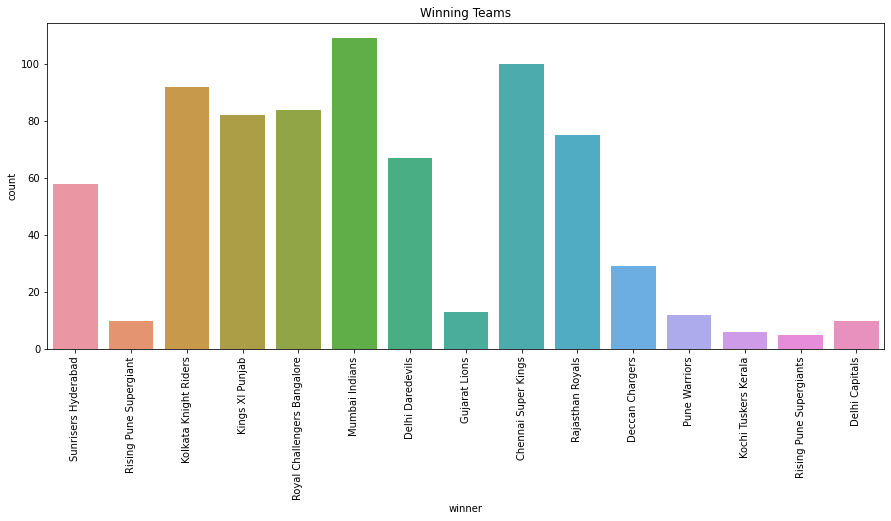

In [11]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'winner', data = df)
plt.title('Winning Teams')
plt.xticks(rotation = 90)
plt.show()

# Visualzing the toss-winner column

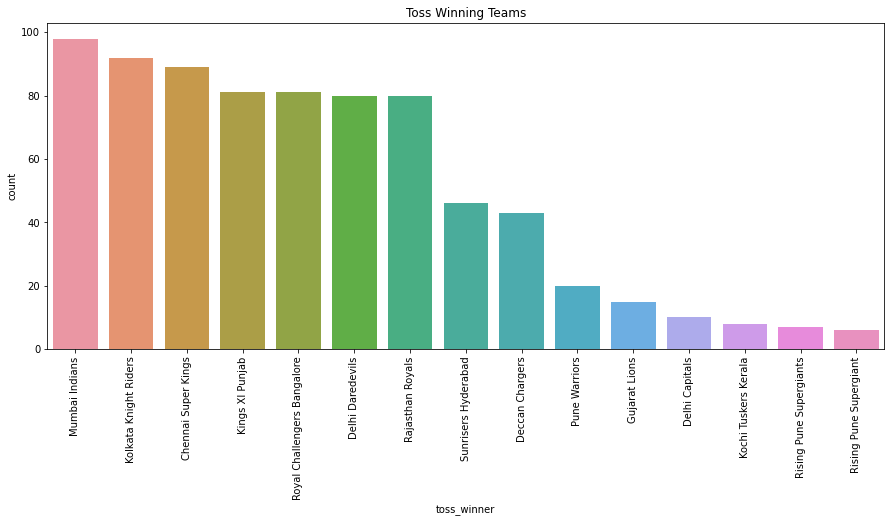

In [12]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'toss_winner', data = df, order = df['toss_winner'].value_counts().index)
plt.title('Toss Winning Teams')
plt.xticks(rotation = 90)
plt.show()

# Visualizing man of the match column

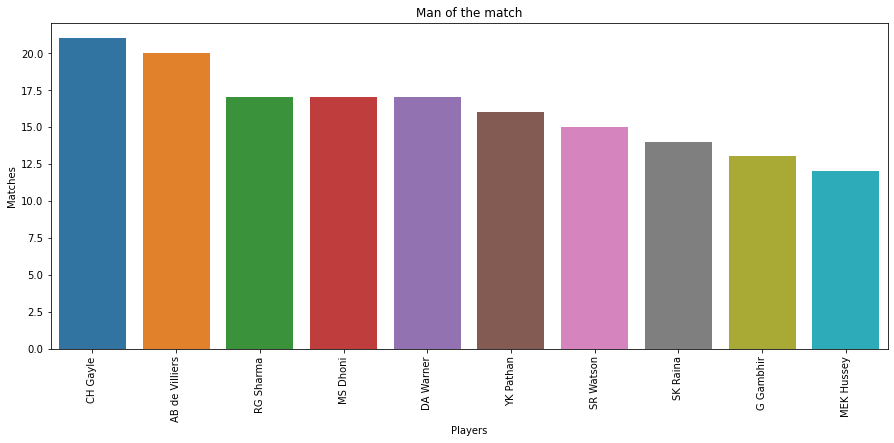

In [13]:
plt.figure(figsize = (15,6))
sns.barplot(x= df.player_of_match.value_counts()[:10].index, y= df.player_of_match.value_counts()[:10])
plt.title('Man of the match')
plt.xlabel('Players')
plt.ylabel('Matches')
plt.xticks(rotation = 90)
plt.show()

In [14]:
df['venue'].value_counts()[:21]

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

# Visualzing how many matches were played at each venue

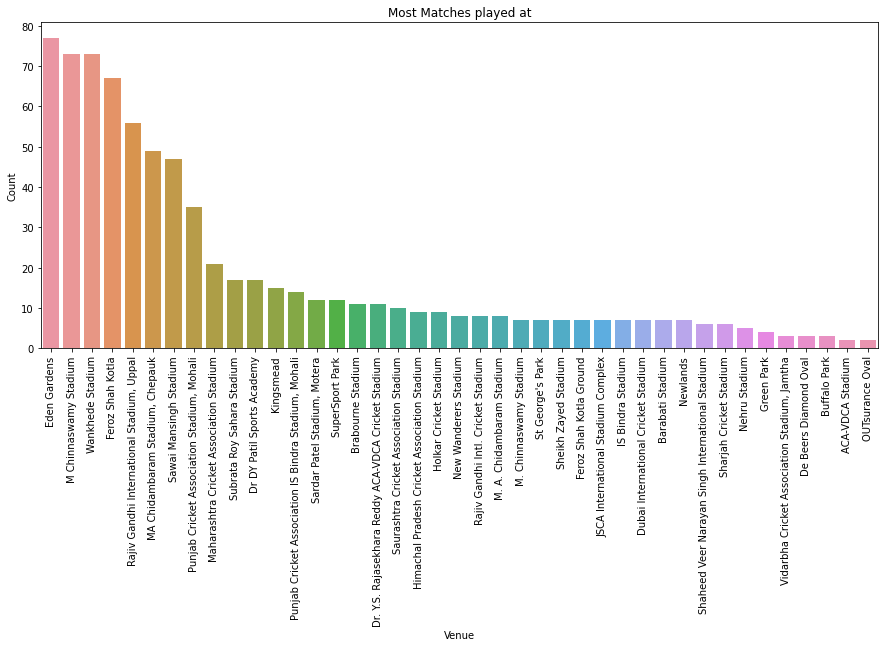

In [15]:
plt.figure(figsize = (15,6))
sns.barplot(x= df['venue'].value_counts().index, y= df['venue'].value_counts())
plt.title('Most Matches played at')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

# Deliveries dataset Analysis

In [16]:
data = pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [17]:
data.shape

(179078, 21)

In [18]:
data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [19]:
#extra runs which were given by the bowlers
data['extra_runs'].sum()

12004

In [20]:
#no ball runs which were given by the bowlers
data['noball_runs'].sum()

749

In [21]:
##penalty runs which were given by the bowlers
data['penalty_runs'].sum()

10

In [22]:
#superovers were played till now
data['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [23]:
#How many wide runs were given by the bowlers
data['wide_runs'].sum()

6576

In [24]:
#leg by runs which were given by the bowlers
data['legbye_runs'].sum()

3785

# Visualizing player dismissal data

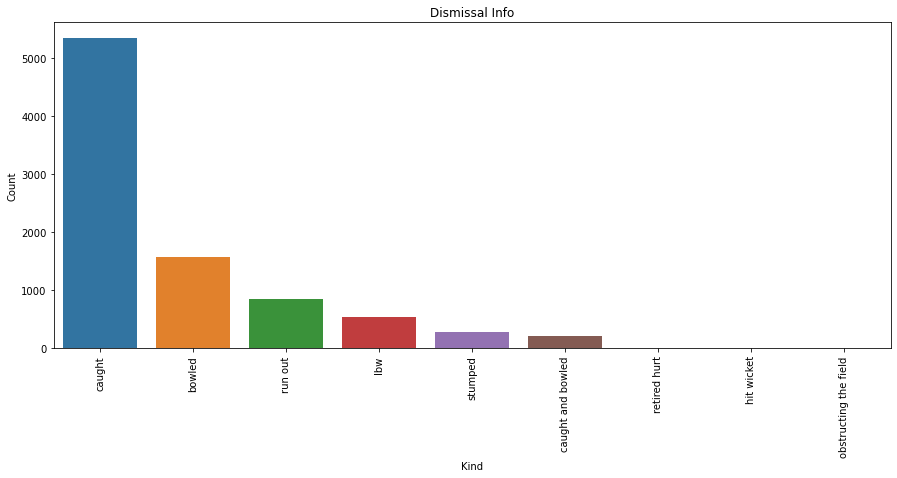

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(data['dismissal_kind'].value_counts().index,data['dismissal_kind'].value_counts().values)
plt.title('Dismissal Info')
plt.xlabel('Kind')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Conclusion
# 1.Most winning team(also in terms of toss) is Mumbai Indians
# 2.Most successful players are Cris Gayle and AB de villiers
# 3.Most matches were played at Eden Gardens,Wankhede Stadium andChinnaswamy Stadium 